In [1]:
# Theses are different ways to display figures, depending on the
# environment, some may work better or some not at all:
%matplotlib inline
# %matplotlib widget
#      widget (installed by ``pip install ipympl``) gives better interactive inline plots
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib nbagg
# Fix failing variable completion (for older installations):
# %config Completer.use_jedi = False

# First, Simplest Usecase

Let's optimize a simple ellipsoid function, $\sum_{i=1}^n 1000^{\frac{i-1}{n-1}}x_i^2$, whose Hessian has a condition number of $10^6$:

In [2]:
# pip install cma  # outcomment in case the cma module is not installed
import cma

fun = cma.ff.elli  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
x0 = 4 * [2]  # initial solution
sigma0 = 1    # initial standard deviation to sample new solutions

x, es = cma.fmin2(fun, x0, sigma0)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=545796, Fri May 16 12:38:18 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 8.840057001916964e+05 1.0e+00 8.85e-01  8e-01  9e-01 0:00.0
    2     16 3.451513484233858e+04 1.3e+00 9.95e-01  8e-01  1e+00 0:00.0
    3     24 3.061411363896062e+04 1.7e+00 9.27e-01  7e-01  1e+00 0:00.0
  100    800 1.392152038833350e-02 1.2e+03 9.39e-02  1e-04  1e-01 0:00.0
  199   1592 2.812282331747640e-15 9.6e+02 3.64e-06  8e-11  7e-08 0:00.1
termination on tolfun=1e-11 (Fri May 16 12:38:19 2025)
final/bestever f-value = 2.111130e-15 2.111130e-15 after 1593/1593 evaluations
incumbent solution: [-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]
std deviation: [7.07979126e-08, 9.01692232e-09, 7.29879449e-10, 7.74013524e-11]


The return values are
- `x`, the best evaluated solution and
- `es`, the `cma.CMAEvolutionStrategy` class instance used to run the optimization.

The latter contains all available information about the run and the more complete return value under `es.result`.

In [3]:
es.result._asdict()  # pretty print the named tuple as dictionary

{'xbest': array([-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]),
 'fbest': 2.111129734045989e-15,
 'evals_best': 1593,
 'evaluations': 1593,
 'iterations': 199,
 'xfavorite': array([-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]),
 'stds': array([7.07979126e-08, 9.01692232e-09, 7.29879449e-10, 7.74013524e-11]),
 'stop': {'tolfun': 1e-11}}

In [4]:
es.result_pretty()  # shows some pretty information and returns es.result

termination on tolfun=1e-11
final/bestever f-value = 2.111130e-15 2.111130e-15 after 1593/1593 evaluations
incumbent solution: [-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]
std deviation: [7.07979126e-08, 9.01692232e-09, 7.29879449e-10, 7.74013524e-11]


CMAEvolutionStrategyResult(xbest=array([-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]), fbest=2.111129734045989e-15, evals_best=1593, evaluations=1593, iterations=199, xfavorite=array([-9.52895176e-09, -4.29641137e-09, -1.32046694e-10, -2.24620040e-13]), stds=array([7.07979126e-08, 9.01692232e-09, 7.29879449e-10, 7.74013524e-11]), stop={'tolfun': 1e-11})

# Options
CMA-ES options can be passed as fourth parameter to `cma.fmin2`. Valid options are

In [5]:
cma.CMAOptions()  # as of cma.__version__ == '4.0.0'

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_active': 'True  # negative update, conducted after the original update',
 'CMA_active_injected': '0  #v weight multiplier for negative weights of injected solutions',
 'CMA_cmean': '1  # learning rate for the mean value',
 'CMA_const_trace': 'False  # normalize trace, 1, True, "arithm", "geom", "aeig", "geig" are valid',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_diagonal_decoding': '0  # learning rate multiplier for additional diagonal update',
 'CMA_eigenmethod': 'np.linalg.eigh  # or cma.utilities.math.eig or pygsl.eigen.eigenvectors',
 'CMA_elitist': 'False  #v or "initial" or True, elitism likely impairs global search performance',
 'CMA_injections_threshold_keep_len': '1  #v keep length if Mahalanobis length is below the given relative threshold',
 'CMA_mirrors': 'popsize < 6  # values <0.5 are int

A `#v` indicates versatile options that can be changed at any time during the run by changing the `opts` attribute of the underlying [`CMAEvolutionStrategy`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAEvolutionStrategy.html) class instance.

To run the code entirely quietly, for example for benchmarking or in final production runs when the desired behavior is established, use `{'verbose':-9'}`.

# Plotting
Let's plot some data from the optimization. The above call to `cma.fmin2` has (by default) written data to the default output folder `outcmaes`. These data will be overwritten each time the function is called again. To prevent this, we could set/change the output folder with the `verb_filenameprefix` option. An effective way to find out this kind of behavior is to query the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) with a search string and read the comments in the return "value".

In [6]:
cma.CMAOptions('file')

{'signals_filename': 'cma_signals.in  # read versatile options from this file (use `None` or `""` for no file) which contains a single options dict, e.g. ``{"timeout": 0}`` to stop, string-values are evaluated, e.g. "np.inf" is valid',
 'verb_append': '0  # initial evaluation counter, if append, do not overwrite output files',
 'verb_filenameprefix': 'outcmaes/  # output path (folder) and filenames prefix',
 'verb_log': '1  #v verbosity: write data to files every verb_log iteration, writing can be time critical on fast to evaluate functions'}

Plotting is as simple as

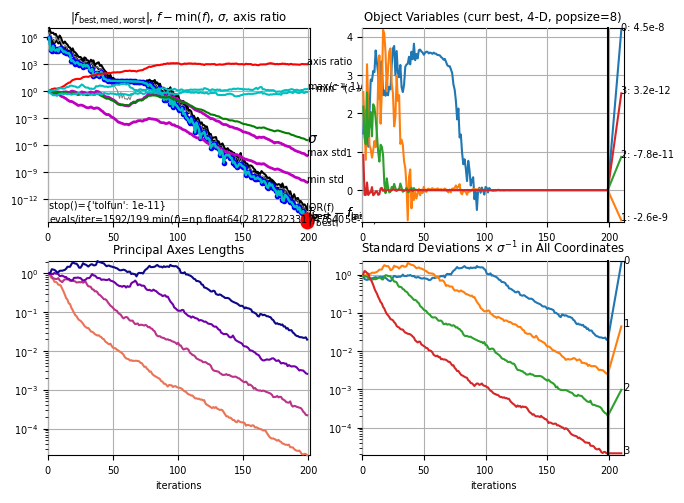

In [7]:
es.plot();  # cma.plot() does the same, as we just plot the data from the default output folder

A description of the output is given in the caption of Figure 3 in [Hansen et al (2015): Evolution Strategies](https://hal.inria.fr/hal-01155533/file/es-overview-2015.pdf#page=17).

# Domain Boundaries

We can add a boundary condition on any variable. The easiest way is to use the function wrapper `UnboundDomain`. Let's bound the second variable from below to values $\ge1$.

In [8]:
lower_bounds = [None, 1, None]
bfun = cma.UnboundDomain(fun, [lower_bounds, None])  # bfun evaluates fun only in the bounded domain

xopt_b, es = cma.fmin2(bfun, x0, sigma0)  # may search in unbounded domain

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=474609, Fri May 16 12:38:19 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.263938182727878e+05 1.0e+00 1.21e+00  1e+00  1e+00 0:00.0
    2     16 3.678597447031720e+04 1.3e+00 1.37e+00  1e+00  1e+00 0:00.0
    3     24 5.923931862568518e+03 1.3e+00 1.34e+00  1e+00  1e+00 0:00.0
  100    800 1.000007377657161e+02 1.0e+03 1.58e-02  2e-05  2e-02 0:00.1
  190   1520 9.999999999999997e+01 1.4e+03 1.72e-06  6e-11  8e-08 0:00.2
termination on tolfun=1e-11 (Fri May 16 12:38:20 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1521/1467 evaluations
incumbent solution: [-5.93993180e-08, 9.50000001e-01, 3.20037044e-10, 5.51631143e-11]
std deviation: [8.22808240e-08, 2.21648081e-09, 6.79799417e-10, 6.42121896e-11]


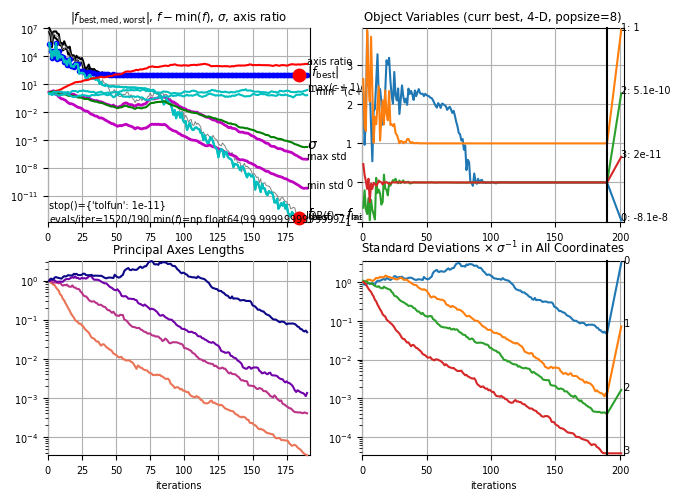

In [9]:
es.plot(xtransform=bfun.transform);  # show x-values (object variables) as evaluated on fun

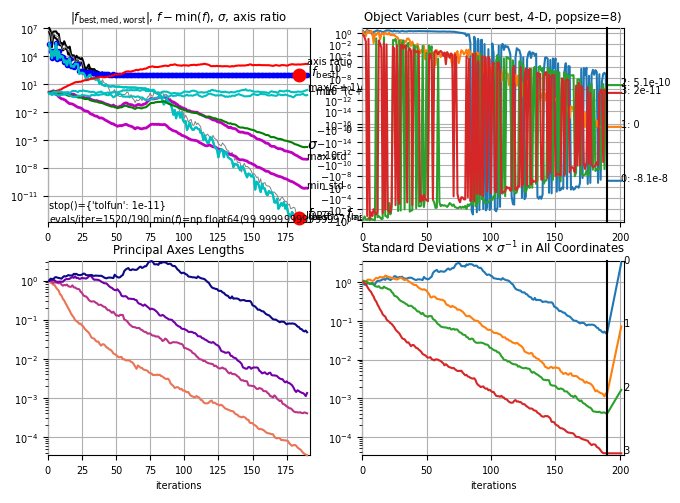

In [10]:
es.plot(xtransform=bfun.transform, xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]
       );  # show evaluated x-values minus x_opt in symlog display

All solutions in `es.result` need to be transformed with `ufun.transform` to represent solutions of `fun`.

In [11]:
bfun.transform(es.result.xbest)

array([ 4.51203154e-08,  1.00000000e+00, -5.58451503e-10,  1.09908196e-11])

We can do the same with a flexible choice of boundary handlers using the `'bounds'` and `'BoundaryHander'` options. We can find out about these option by calling `CMAOptions`, as mentioned above, like

In [12]:
cma.CMAOptions('bound')  # returns options that contain "bound"

{'BoundaryHandler': 'BoundTransform  # or BoundPenalty, unused when ``bounds in (None, [None, None])``',
 'bounds': '[None, None]  # lower (=bounds[0]) and upper domain boundaries, each a scalar or a list/vector',
 'maxstd_boundrange': '1/3  # maximal std relative to bound_range per coordinate, overruled by maxstd'}

The default handler `BoundTransform` is based on the same code as `UnboundDomain`. In this case, the initial solution must be within the given bounds (it is, in our case). As above, `'bounds'` is a list of two values, `[lower_bounds, upper_bounds]`, where `lower_bounds` and `upper_bounds` can be a scalar that applies to all variables or a list. If the list is shorter than the initial solution, the last value is applied to the remaining dimensions.

Running the same example as above with the bounds option:

In [13]:
xopt_b, es_b = cma.fmin2(fun, x0, sigma0, {'bounds': [[None, 1, None], None]})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=536680, Fri May 16 12:38:21 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.688153629326372e+06 1.0e+00 8.87e-01  8e-01  9e-01 0:00.0
    2     16 5.618995449078516e+04 1.2e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 8.430620461718443e+04 1.5e+00 9.55e-01  9e-01  1e+00 0:00.0
  100    800 1.000861926432218e+02 1.2e+03 8.29e-02  1e-04  2e-01 0:00.1
  200   1600 1.000000000000006e+02 1.4e+03 2.44e-05  9e-10  1e-06 0:00.1
  220   1760 9.999999999999997e+01 1.5e+03 2.53e-06  4e-11  5e-08 0:00.1
termination on tolfun=1e-11 (Fri May 16 12:38:21 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1761/1700 evaluations
incumbent solution: [ 2.17061715e-08, 1.00000000e+00, 4.99400446e-10, -3.38052323e-11]
std deviation: [4.79244302e-08, 1.18566946e-09, 4.41061380e-10, 3.93990534e-11]


In [ ]:
# now solutions _are_ transformed, the mean is not (hence ``plot_mean=True`` should use ``.boundary_handler.transform``)
es_b.result.xbest, es_b.mean, es_b.boundary_handler.transform(es_b.mean)

(array([6.14367043e-08, 1.00000000e+00, 3.65914379e-10, 5.60461803e-11]),
 array([ 2.17061715e-08,  9.49999999e-01,  4.99400446e-10, -3.38052323e-11]),
 array([ 2.17061715e-08,  1.00000000e+00,  4.99400446e-10, -3.38052323e-11]))

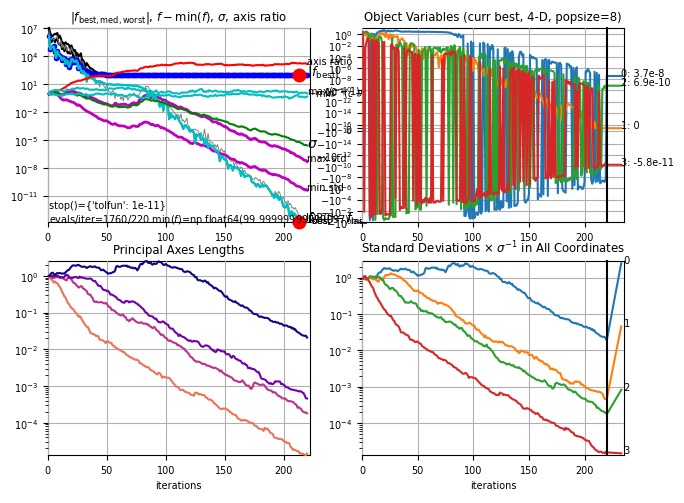

In [15]:
es_b.plot(xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]);

# Rescaling of the Objective
In a practical application, the encoding of variables is often essential to turn a _very_ difficult problem into less difficult one, see also [here](https://cma-es.github.io/cmaes_sourcecode_page.html#practical). The simplest encoding is a rescaling, which can be done via the [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html) class. Again, [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) gives the hint where to look.

In [16]:
cma.CMAOptions('scale')

{'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`'}

We rescale the ellipsoid function to its most benign form. In dimension 4, this saves (only) about 50% of the necessary evaluations.

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=441536, Fri May 16 12:38:22 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 9.429748406321316e+00 1.0e+00 9.21e-01  8e-01  9e-01 0:00.0
    2     16 6.458204584678635e+00 1.4e+00 9.63e-01  9e-01  1e+00 0:00.0
    3     24 4.936420733932716e+00 1.5e+00 1.00e+00  9e-01  1e+00 0:00.0
   72    576 4.807170646245472e-09 1.9e+00 1.82e-03  9e-05  1e-04 0:00.0
termination on ftarget=1e-08 (Fri May 16 12:38:22 2025)
final/bestever f-value = 1.019542e-08 4.807171e-09 after 577/570 evaluations
incumbent solution: [-8.90919754e-05, 3.86209279e-05, -2.63693148e-06, 2.75592578e-05]
std deviation: [9.45226708e-05, 1.42697642e-04, 1.06993618e-04, 1.30145414e-04]


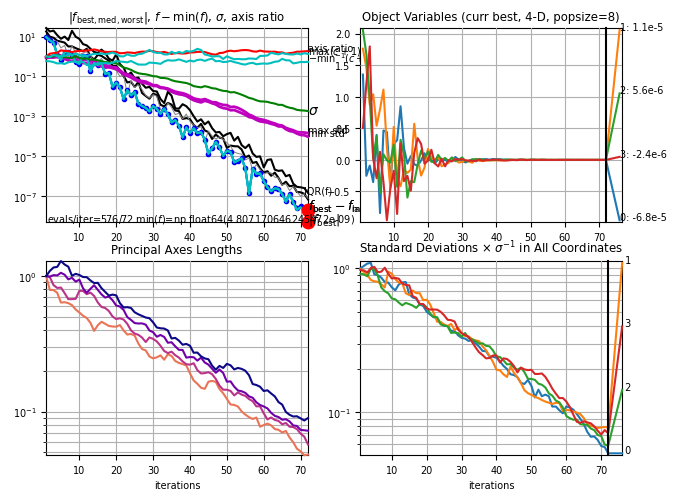

In [17]:
fun2 = cma.ScaleCoordinates(fun, [1000**(-i / 3) for i in range(4)])
xopt2, es2 = cma.fmin2(fun2, x0, sigma0, {'ftarget':1e-8})
cma.plot();

On the 40-dimension ellipsoid function, the saving is a factor of almost 10:

In [18]:
xopt40, es40 = cma.fmin2(fun, 40 * [2], sigma0, {'ftarget': 1e-8, 'verbose':-9})
xopt0, es0 = cma.fmin2(cma.ScaleCoordinates(fun,
                                            [1000**(-i / 39) for i in range(40)]),
                       40 * [2], sigma0, {'ftarget': 1e-8, 'verbose':-9})

In [19]:
es40.result.fbest, es0.result.fbest, es40.result.evals_best / es0.result.evals_best

(7.805230338164816e-09, 7.3884443306810875e-09, 10.054751041460028)

Without covariance matrix adaptation, the saving from rescaling is _much_ more substantial, namely a factor of about $10\,000$, which can be inferred from Figure 10 in [Hansen and Ostermeier (2001)](http://www.cmap.polytechnique.fr/~nikolaus.hansen/publications.html#hansenaost2001).

# Advanced Options Settings
## Setting the step-size adaptation
Apart from the default cumulative step-size adaptation, another competitive way to adapt the step-size is the two-point step-size adaptation, TPA, see Equations (6)-(8) in [Akimoto and Hansen (2016)](https://hal.inria.fr/hal-01306551).

In [20]:
cma.CMAOptions('sigma')

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_dampsvec_fac': 'np.inf  # tentative and subject to changes, 0.5 would be a "default" damping for sigma vector update',
 'CMA_dampsvec_fade': '0.1  # tentative fading out parameter for sigma vector update',
 'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'CSA_squared': 'False  #v use squared length for sigma-adaptation ',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`',
 'stall_sigma_change_on_divergence_iterations': 'False  #v number of iterations of median worsenings threshold at which the sigma change is stalled; the default may become 2',
 'to

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=471667, Fri May 16 12:38:26 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.644856454207514e+06 1.0e+00 9.55e-01  9e-01  9e-01 0:00.0
    2     16 2.181105038778763e+04 1.1e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 3.765576260517809e+02 1.3e+00 1.10e+00  1e+00  1e+00 0:00.0
  100    800 1.919787475149347e-01 7.3e+02 3.08e-01  4e-04  2e-01 0:00.1
  200   1600 3.380532881122520e-15 1.3e+03 6.86e-06  1e-10  1e-07 0:00.1
  202   1616 8.749402117182278e-15 1.2e+03 5.79e-06  9e-11  9e-08 0:00.1
termination on tolfun=1e-11 (Fri May 16 12:38:26 2025)
final/bestever f-value = 5.586611e-16 5.586611e-16 after 1617/1617 evaluations
incumbent solution: [ 6.95278391e-09, -7.28269733e-10, 2.06931153e-10, -5.39232305e-12]
std deviation: [8.71866540e-08, 8.23058626e-09, 1.03527744e-09, 8.59087717e-11]


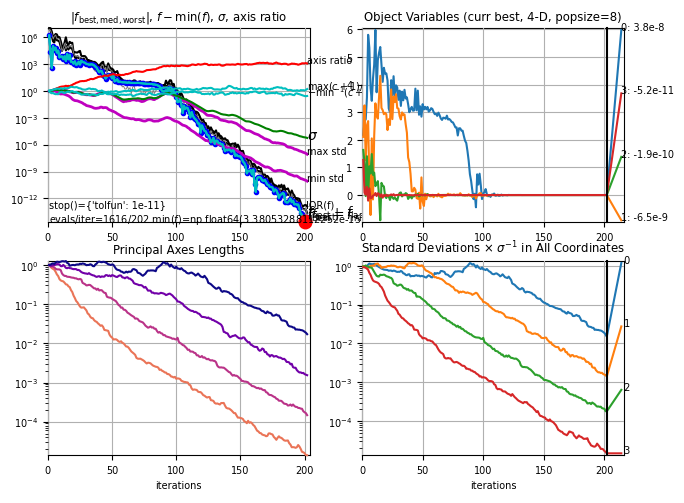

In [21]:
xopt, es = cma.fmin2(fun, x0, sigma0,
                     {'AdaptSigma': cma.sigma_adaptation.CMAAdaptSigmaTPA})
es.plot();

Without step-size adaptation, the "final" convergence stage of the optimization takes about 3 to 4 times longer (this effect becomes more pronounced in higher dimension):

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=560342, Fri May 16 12:38:26 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.999210515321815e+05 1.0e+00 1.00e+00  1e+00  1e+00 0:00.0
    2     16 4.296374197405368e+04 1.4e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 5.787047445291244e+04 1.7e+00 1.00e+00  1e+00  1e+00 0:00.0
  100    800 9.103685050096928e-02 1.5e+03 1.00e+00  6e-04  8e-01 0:00.0
  200   1600 5.691265496702980e-05 8.2e+02 1.00e+00  6e-06  5e-03 0:00.1
  300   2400 1.457381222709259e-08 1.8e+03 1.00e+00  6e-08  1e-04 0:00.1
  400   3200 1.224098576518142e-12 9.7e+02 1.00e+00  8e-10  8e-07 0:00.2
  414   3312 2.083378273037876e-13 1.1e+03 1.00e+00  4e-10  4e-07 0:00.2
termination on tolfun=1e-11 (Fri May 16 12:38:27 2025)
final/bestever f-value = 1.965401e-13 1.122116e-13 after 3313/3280 evaluations
incumbent solution: [-1.21905076e-07, -4.29134664e-09, 4.23698324e-09, -1.78164830e-11]
std deviation: [3.99432246e-07, 

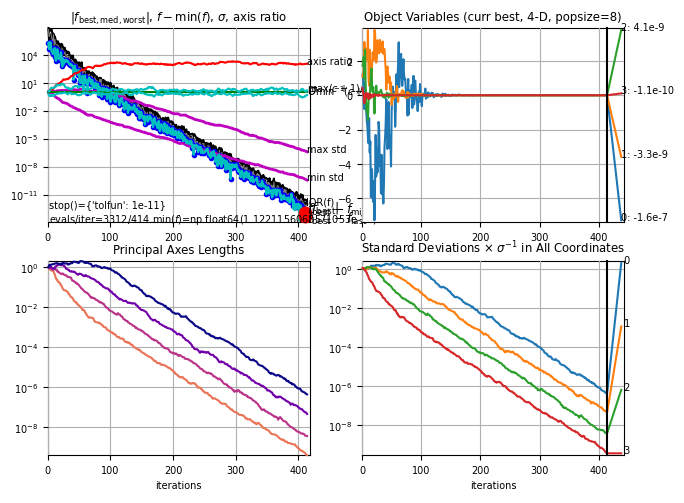

In [22]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'AdaptSigma': False})
es.plot();

## Setting different learning rates (not basics)
A more research related option is the manual setting of learning rates. We can find the relevant options for the covariance matrix update like

In [23]:
cma.CMAOptions('covar')

{'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_on': '1  # multiplier for all covariance matrix updates',
 'CMA_rankmu': '1.0  # multiplier for rank-mu update learning rate of covariance matrix',
 'CMA_rankone': '1.0  # multiplier for rank-one update learning rate of covariance matrix',
 'tolconditioncov': '1e14  #v stop if the condition of the covariance matrix is above `tolconditioncov`'}

If we want to run CMA-ES only with rank-$\mu$ update, we set the learning rate for the rank-one update to zero. Then, to get a solution of the same quality on the 4-dimensional ellipsoid function, it takes on average about 15% more iterations.

In [24]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'CMA_rankone': 0})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=488082, Fri May 16 12:38:27 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 9.235948633113569e+05 1.0e+00 9.16e-01  9e-01  1e+00 0:00.0
    2     16 1.274426298900614e+05 1.2e+00 1.21e+00  1e+00  1e+00 0:00.0
    3     24 4.632592724807502e+04 1.5e+00 1.47e+00  1e+00  2e+00 0:00.0
  100    800 4.105657556405449e-01 4.9e+02 5.96e-02  4e-04  2e-01 0:00.0
  200   1600 1.252412592265290e-12 8.8e+02 1.40e-06  1e-09  9e-07 0:00.1
  218   1744 1.640226741612292e-14 1.1e+03 1.44e-07  7e-11  7e-08 0:00.1
termination on tolfun=1e-11 (Fri May 16 12:38:27 2025)
final/bestever f-value = 1.281648e-14 7.380522e-15 after 1745/1730 evaluations
incumbent solution: [-4.39125082e-08, 6.30351307e-09, -7.90367265e-10, 2.58444840e-11]
std deviation: [6.64703233e-08, 7.26409480e-09, 6.04346943e-10, 7.16315878e-11]


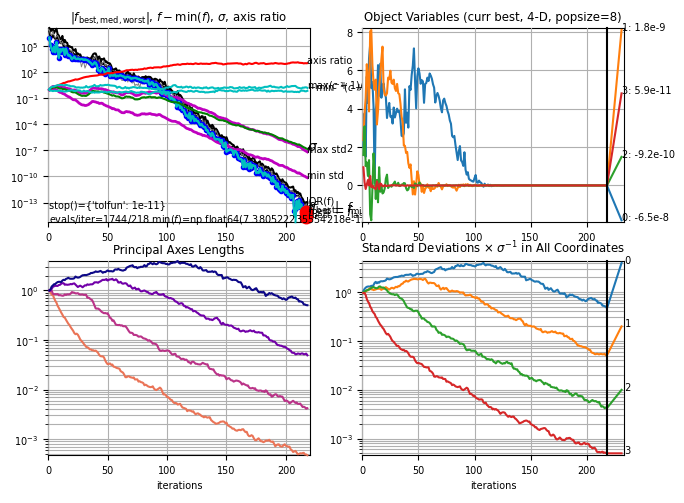

In [25]:
es.plot();

# See Also

Other [`notebooks and recipes`](https://github.com/CMA-ES/pycma/tree/master/notebooks), as this one, can be found at [https://github.com/CMA-ES/pycma/tree/master/notebooks](https://github.com/CMA-ES/pycma/tree/master/notebooks)

More `notebook-recipes` to come...